# **Question 2** 

In [1]:
# Import Libraries
import numpy as np
import cv2
from scipy.ndimage import uniform_filter

In [2]:
def calculate_global_stats(image):
    """
    Calculate global mean and standard deviation of the image
    """
    return np.mean(image), np.std(image)

In [ ]:
def calculate_local_stats(image, window_size=3):
    """
    Calculate local mean and standard deviation for each pixel using a sliding window
    """
    # Calculate local mean
    local_mean = uniform_filter(image.astype(float), size=window_size)
    
    # Calculate local variance
    local_variance = uniform_filter(image.astype(float)**2, size=window_size) - local_mean**2
    
    # Calculate local standard deviation
    local_std = np.sqrt(np.maximum(local_variance, 0))
    
    return local_mean, local_std

In [4]:
def enhance_local_contrast(image, C=22.8, k0=0, k1=0.1, k2=0, k3=0.1, window_size=3):
    """
    Enhance image using local statistics method as described in the text
    
    Parameters:
    -----------
    image : numpy.ndarray
        Input image
    C : float
        Enhancement constant
    k0, k1 : float
        Constants for mean intensity condition (k0 < k1)
    k2, k3 : float
        Constants for standard deviation condition (k2 < k3)
    window_size : int
        Size of the local window for statistics calculation
    
    Returns:
    --------
    numpy.ndarray
        Enhanced image
    """
    # Convert image to float type for processing
    image_float = image.astype(float)
    
    # Calculate global statistics
    global_mean, global_std = calculate_global_stats(image_float)
    print(f"Global mean: {global_mean:.2f}")
    print(f"Global standard deviation: {global_std:.2f}")
    
    # Calculate local statistics
    local_mean, local_std = calculate_local_stats(image_float, window_size)
    
    # Create enhancement mask based on conditions
    mean_condition = (k0 * global_mean <= local_mean) & (local_mean <= k1 * global_mean)
    std_condition = (k2 * global_std <= local_std) & (local_std <= k3 * global_std)
    enhancement_mask = mean_condition & std_condition
    
    # Create enhanced image
    enhanced_image = np.where(enhancement_mask, C * image_float, image_float)
    
    # Clip values to valid range
    enhanced_image = np.clip(enhanced_image, 0, 255)
    
    return enhanced_image.astype(np.uint8)

In [5]:
def process_image(image_path):
    """
    Process the image and return both original and enhanced images
    """
    try:
        # Read the image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        if image is None:
            raise ValueError("Could not read the image. Please check if the image file exists.")
        
        print("Image loaded successfully!")
        print(f"Image shape: {image.shape}")
        
        # Parameters from the text
        params = {
            'C': 22.8,        # Enhancement constant
            'k0': 0,          # Lower bound for mean condition
            'k1': 0.1,        # Upper bound for mean condition
            'k2': 0,          # Lower bound for std condition
            'k3': 0.1,        # Upper bound for std condition
            'window_size': 3  # Window size for local statistics
        }
        
        print("\nProcessing image with parameters:")
        for key, value in params.items():
            print(f"{key}: {value}")
        
        # Enhance the image
        enhanced_image = enhance_local_contrast(image, **params)
        
        return image, enhanced_image
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None, None


Image loaded successfully!
Image shape: (512, 512)

Processing image with parameters:
C: 22.8
k0: 0
k1: 0.1
k2: 0
k3: 0.1
window_size: 3
Global mean: 160.66
Global standard deviation: 103.00

Processing completed successfully!


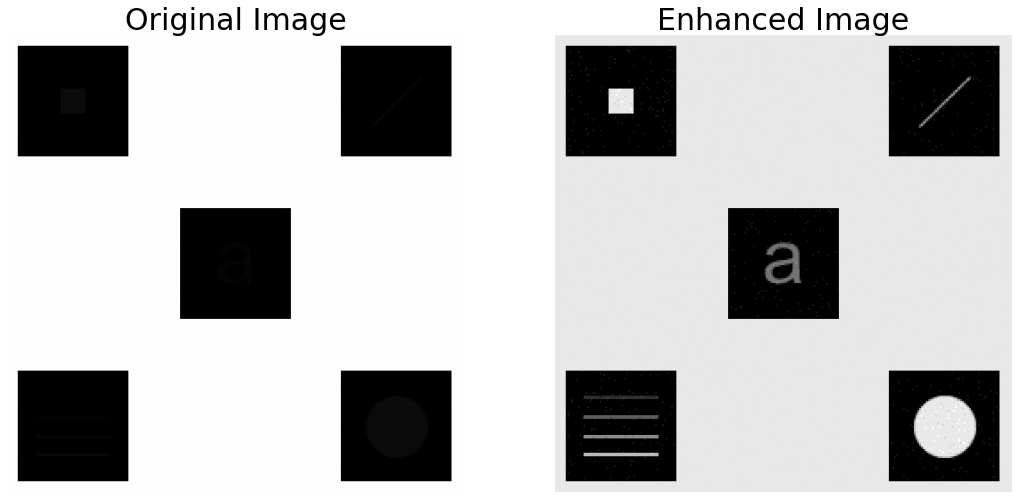

In [6]:
# Example usage:
if __name__ == "__main__":
    # Get original and enhanced images
    original, enhanced = process_image('image 2.tif')
    
    if original is not None and enhanced is not None:
        print("\nProcessing completed successfully!")
        
        # show the images using matplotlib
        import matplotlib.pyplot as plt
        
        plt.figure(figsize=(18, 12))
        plt.subplot(121)
        plt.imshow(original, cmap='gray')
        plt.title('Original Image',size=30)
        plt.axis('off')
        
        plt.subplot(122)
        plt.imshow(enhanced, cmap='gray')
        plt.title('Enhanced Image',size=30)
        plt.axis('off')
        
        plt.show()